<a href="https://colab.research.google.com/github/rgvjoshi/Deep_learning_CIS_831/blob/main/Assignment_1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount the file from drive to Colab

In [1]:
# mount it
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Add data by putting the location of source file.

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Assignment 1/housing.csv')

Remove data with missing values.

In [2]:
# Drop rows with any missing value
df_cleaned = df.dropna()

Import important packages for using PyTorch.

In [3]:
import torch
import numpy as np
import torch.nn as nn #importing library for neural networks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Define x and y. Also, convert x and y from numpy to tensors.

**Important** "x" does not include ocean_proximity.

In [4]:
x = df_cleaned.iloc[:,:8]
y = df_cleaned.iloc[:,8:9]
x = torch.tensor(x.values)
y = torch.tensor(y.values)

**Question 1:** Divide data into training (70%) and testing (30%) sets.

In [5]:
# using the train test split function
x_train, x_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104,
                                   test_size=0.30,
                                   shuffle=True)

**Question 2:** Scaling the features.
Used MinMax Scaler to feature scaling and converted x-values to be in the range of [-1,1].

Feature scaling is important as it makes gradient descent work more efficiently. After scaling, it takes less time for the gradient descent to find local minimum.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.fit_transform(y_test)

In [7]:
# Convert x_train_scaled to a PyTorch tensor
x_train = torch.tensor(x_train)
x_test = torch.tensor(x_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

**Question 3:** Linear model

In [8]:
from torch.nn import MSELoss
from torch.optim import SGD

Define the functions to be used later.

In [9]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = torch.nn.Linear(in_features=8, out_features=1)

  def forward(self, X):
    out = self.linear(X)
    return out

Define the hyperparameters.

In [20]:
step_size = 0.01  #learning rate
loss_train_list = []
loss_test_list = []
iter = 1500

Code for linear model

In [21]:
model = Model()
criterion = MSELoss(reduction='mean')
optimizer = SGD(model.parameters(), lr=step_size)

Ensure all the training and testing data types are same.

In [22]:
x_train = x_train.float()
y_train = y_train.float()
x_test = x_test.float()
y_test = y_test.float()

Run the loop for forward and backward passes.

In [23]:
for i in range (iter):
    # making predictions with forward pass
    y_train_pred = model(x_train)
    # calculating the loss between original and predicted data points
    loss_train = criterion(y_train_pred, y_train)
    # storing the calculated loss in a list
    loss_train_list.append(loss_train.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss_train.backward()
    # updating the parameters after each iteration
    optimizer.step()
    # zeroing gradients after each iteration
    optimizer.zero_grad()
    # priting the values for understanding
    print('Training: {},\t{}'.format(i, loss_train.item()))
    #############################################
    #      TESTING
    #############################################
    # In this block gradients are not calculated and no update to the parameters is done
    with torch.no_grad():
      y_test_pred = model(x_test)
      loss_test = criterion(y_test_pred, y_test)
      loss_test_list.append(loss_test)
      print('Testing: {},\t{}'.format(i, loss_test.item()))

Training: 0,	0.6407924294471741
Testing: 0,	0.5173794627189636
Training: 1,	0.5686547160148621
Testing: 1,	0.46486812829971313
Training: 2,	0.508666455745697
Testing: 2,	0.4211849868297577
Training: 3,	0.458763986825943
Testing: 3,	0.38482993841171265
Training: 4,	0.4172340929508209
Testing: 4,	0.35455769300460815
Training: 5,	0.3826548755168915
Testing: 5,	0.3293347656726837
Training: 6,	0.35384616255760193
Testing: 6,	0.3083032965660095
Training: 7,	0.3298282027244568
Testing: 7,	0.2907514274120331
Training: 8,	0.3097878396511078
Testing: 8,	0.2760882079601288
Training: 9,	0.293050080537796
Testing: 9,	0.26382315158843994
Training: 10,	0.27905455231666565
Testing: 10,	0.25354933738708496
Training: 11,	0.2673362195491791
Testing: 11,	0.24492888152599335
Training: 12,	0.2575090229511261
Testing: 12,	0.23768141865730286
Training: 13,	0.24925248324871063
Testing: 13,	0.23157425224781036
Training: 14,	0.2423005998134613
Testing: 14,	0.2264142483472824
Training: 15,	0.23643258213996887
Tes

**Question 4:** Visualize the data.

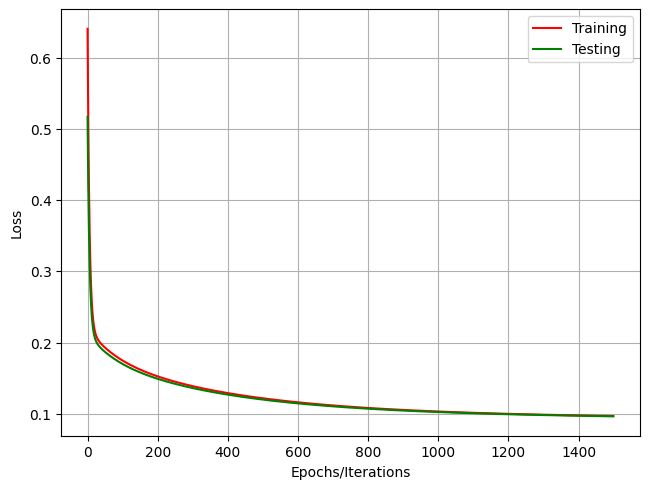

In [24]:
# Plotting the loss after each iteration
plt.plot(loss_train_list, 'r', label='Training')
plt.plot(loss_test_list, 'g', label='Testing')
plt.tight_layout()
plt.grid('True')
plt.legend()
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

Define a new learning rate. In this case, I chose learning rate as 0.5.

In [56]:
step_size_2 = 0.001  #learning rate
loss_train_list = []
loss_test_list = []
iter = 1500

In [57]:
x_train = x_train.float()
y_train = y_train.float()
x_test = x_test.float()
y_test = y_test.float()

In [58]:
model = Model()
criterion = MSELoss(reduction='mean')
optimizer = SGD(model.parameters(), lr=step_size_2)

In [59]:
for i in range (iter):
    # making predictions with forward pass
    y_train_pred = model(x_train)
    # calculating the loss between original and predicted data points
    loss_train = criterion(y_train_pred, y_train)
    # storing the calculated loss in a list
    loss_train_list.append(loss_train.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss_train.backward()
    # updating the parameters after each iteration
    optimizer.step()
    # zeroing gradients after each iteration
    optimizer.zero_grad()
    # priting the values for understanding
    print('Training: {},\t{}'.format(i, loss_train.item()))
    #############################################
    #      TESTING
    #############################################
    # In this block gradients are not calculated and no update to the parameters is done
    with torch.no_grad():
      y_test_pred = model(x_test)
      loss_test = criterion(y_test_pred, y_test)
      loss_test_list.append(loss_test)
      print('Testing: {},\t{}'.format(i, loss_test.item()))

Training: 0,	1.7260611057281494
Testing: 0,	1.5766446590423584
Training: 1,	1.6997764110565186
Testing: 1,	1.5534083843231201
Training: 2,	1.6739563941955566
Testing: 2,	1.5305776596069336
Training: 3,	1.648592233657837
Testing: 3,	1.5081450939178467
Training: 4,	1.623676061630249
Testing: 4,	1.4861037731170654
Training: 5,	1.5992001295089722
Testing: 5,	1.464446783065796
Training: 6,	1.575156331062317
Testing: 6,	1.4431674480438232
Training: 7,	1.5515373945236206
Testing: 7,	1.422258973121643
Training: 8,	1.5283350944519043
Testing: 8,	1.40171480178833
Training: 9,	1.5055429935455322
Testing: 9,	1.3815284967422485
Training: 10,	1.4831533432006836
Testing: 10,	1.3616943359375
Training: 11,	1.4611588716506958
Testing: 11,	1.342205286026001
Training: 12,	1.439552664756775
Testing: 12,	1.3230559825897217
Training: 13,	1.4183281660079956
Testing: 13,	1.3042398691177368
Training: 14,	1.3974783420562744
Testing: 14,	1.2857515811920166
Training: 15,	1.3769965171813965
Testing: 15,	1.267585039

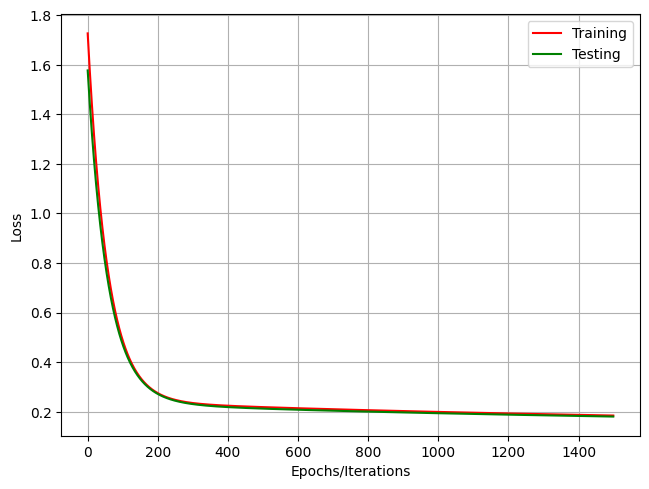

In [60]:
# Plotting the loss after each iteration
plt.plot(loss_train_list, 'r', label='Training')
plt.plot(loss_test_list, 'g', label='Testing')
plt.tight_layout()
plt.grid('True')
plt.legend()
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

**Question 5:** Comparison of performance in training and testing data:

Total number of iterations chosen were 1500 as below this, the model could not converge the losses. I chose two learning rates - 0.01 and 0.001. I am attaching the learning curves I obtained and used to compare the performance. Everytime I run the code, curves change. Therefore, I wanted to make comparison on the ones I observed.

When learning rate was 0.01, the loss starts at 0.5 and shows rapid decrease within the first 100 epochs. The learning rate is higher, which allows for faster convergence. Also, the final loss is 0.1, which is lower than the final loss observed with learning rate of 0.001. This graphs shows that learning rate of 0.01 converges faster and has a better performance than 0.001.

Learning rate - 0.01

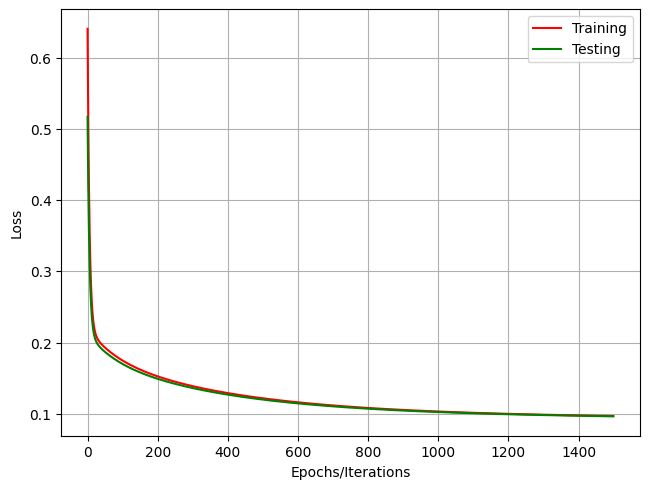

When the learning rate was reduced to 0.001, the loss starts at higher value of 1.8, but gradually decreased with increase in epochs. After 200 epochs, rate of loss reduction slows down as the training continues. The learning is steady and the model converges well, the slow learning rate means that the model takes significant time to reach a lower loss value. The final loss is still around 0.2, which is higher than the learning rate of 0.01. Therefore, this rate is not as good as 0.01, as it learns slower and stabalizes at a higher loss value.

Learning rate - 0.001

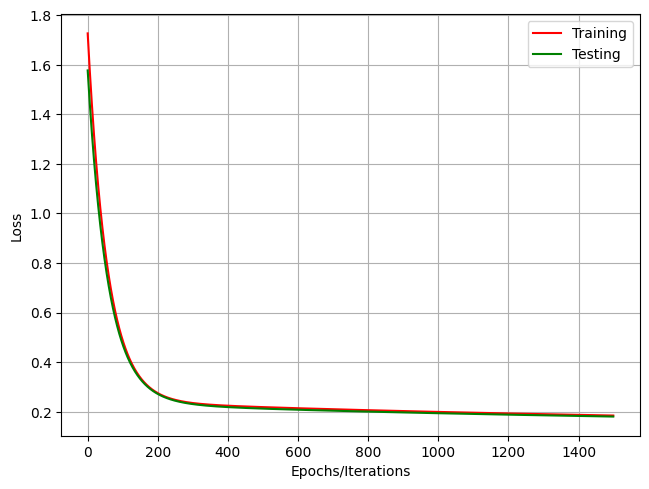